### Création du Modèle En tenant Compte Du temps

* Importation de Différentes Librairie

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
sns.set()
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
warnings.filterwarnings('ignore')

* Chargement Du Dataset

In [2]:
df = pd.read_csv('dataset.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [5]:
df.shape

(1718, 80)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147502,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [8]:
target_adj_close = pd.DataFrame(df['Adj Close'])
feature_columns = df.drop('Adj Close',axis=1).columns

* Normalisation des Données

In [11]:
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(df[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=df.index)
feature_minmax_transform.head()

,Open,High,Low,Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,0.744604,0.738369,0.708213,0.708932,0.216899,0.005672,0.005128,0.011410,0.010907,0.005227,...,0.882804,0.871333,0.866741,0.069810,0.860865,0.843595,0.843889,0.827313,0.827313,0.106029
2011-12-16,0.738655,0.744116,0.738341,0.748598,0.180089,0.000994,0.003671,0.007393,0.007502,0.006067,...,0.893396,0.893556,0.889119,0.050814,0.839550,0.830756,0.834374,0.831424,0.831424,0.105682
2011-12-19,0.754842,0.750821,0.744669,0.743674,0.119667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.870633,0.860000,0.855329,0.045691,0.845767,0.829297,0.840321,0.829369,0.829369,0.058437
2011-12-20,0.773381,0.772304,0.775210,0.772534,0.082714,0.000702,0.010605,0.001979,0.021005,0.016988,...,0.900834,0.900444,0.896056,0.030410,0.872706,0.863146,0.878680,0.869310,0.869310,0.082454
2011-12-21,0.775595,0.773673,0.769019,0.774997,0.113697,0.010934,0.011887,0.015834,0.022390,0.018108,...,0.901961,0.899778,0.895385,0.017568,0.883659,0.881529,0.887600,0.885463,0.885463,0.088738


In [12]:
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

Shape of features :  (1718, 79)
Shape of target :  (1718, 1)


Shift target array because we want to predict the n + 1 day value

In [13]:
target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-21,0.252767,0.249863,0.252304,0.249214,0.131396,0.728995,0.742279,0.698277,0.694847,0.732066,...,0.177372,0.177111,0.192937,0.257007,0.053286,0.051065,0.055605,0.047283,0.047283,0.346662
2018-12-24,0.258024,0.262042,0.266061,0.266995,0.089215,0.683974,0.690595,0.665037,0.658145,0.697890,...,0.185936,0.191556,0.208286,0.245259,0.049438,0.043478,0.047874,0.039060,0.039060,0.188254
2018-12-26,0.272551,0.273810,0.266061,0.262071,0.138587,0.666024,0.721711,0.662068,0.726470,0.761514,...,0.183232,0.181111,0.197188,0.314989,0.042333,0.055150,0.046387,0.056975,0.056975,0.365682
2018-12-27,0.271859,0.272441,0.273903,0.274518,0.112378,0.704613,0.734005,0.692339,0.737377,0.771670,...,0.187063,0.188889,0.205452,0.209582,0.052398,0.047272,0.050550,0.048752,0.048752,0.325400
2018-12-28,0.275042,0.274904,0.281882,0.281220,0.058103,0.745600,0.752127,0.735941,0.735530,0.769951,...,0.184133,0.180667,0.196715,0.198334,0.050918,0.047272,0.050847,0.046109,0.046109,0.199288


,Adj Close
Date,
2018-12-21,120.019997
2018-12-24,119.660004
2018-12-26,120.570000
2018-12-27,121.059998
2018-12-28,121.250000



 -----After process------ 

Shape of features :  (1628, 79)
Shape of target :  (1628, 1)


,Adj Close
Date,
2018-08-13,113.070000
2018-08-14,111.099998
2018-08-16,112.129997
2018-08-17,112.690002
2018-08-20,113.019997


* Train Test Split

In [15]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [16]:
X_train.shape

(1480, 79)

In [17]:
X_test.shape

(148, 79)

In [18]:
y_train.shape

(1480,)

In [19]:
y_test.shape

(148,)

In [30]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Prediction')
    plt.plot(validation_y.index, validation_y,'b', label='Valeur Réelle')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Prediction vs Valeur Réelle')
    plt.legend(loc='upper right')
    plt.show()

* Implementation des Modèles

1-DecisionTreeRegresor

RMSE:  1.3871335888324687
R2 score:  0.5568129440781904


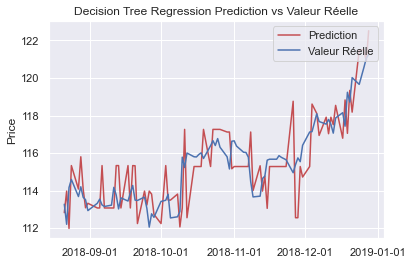

In [31]:
dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

2 - Support Vector Regressor(SVR)

RMSE:  0.8339658146483299
R2 score:  0.8398057259347087


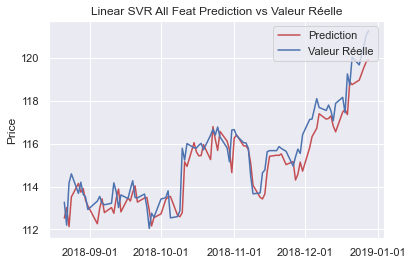

In [34]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')

* Ajustement des hyperparamètres du SVR

RMSE:  0.6907345914246125
R2 score:  0.890106272972212


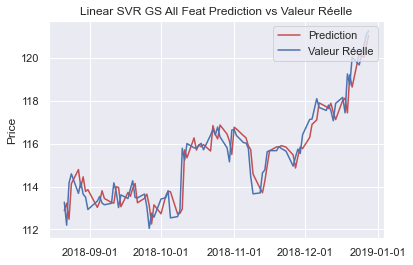

In [37]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}
lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)
lsvr_grid_search_feat.fit(X_train, y_train)

validate_result(lsvr_grid_search_feat,'Linear SVR GS All Feat')

In [51]:
solution_models['SVR All Feat'] = lsvr_grid_search_feat

3 - Random Forest

RMSE:  0.8360012380650488
R2 score:  0.8390228135541351


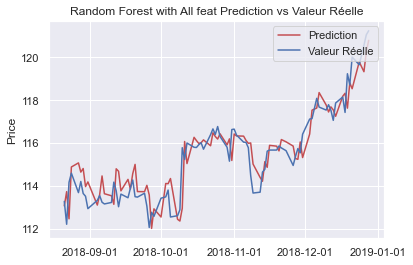

In [40]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')

 * Ajustement des hyperparamètres

In [41]:
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}
grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)
grid_search_RF_feat.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 50, 100]})

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}
RMSE:  0.8088958270710754
R2 score:  0.8492922169496762


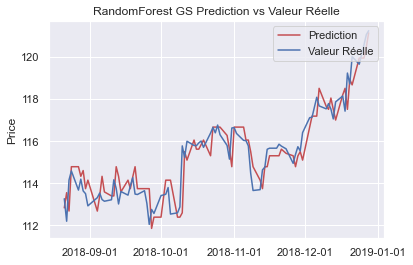

In [42]:
print(grid_search_RF_feat.best_params_)
validate_result(grid_search_RF_feat,'RandomForest GS')

In [50]:
solution_models['Random_Forest with Feat'] = random_forest_clf_feat

4 - Lasso and Ridge

RMSE:  0.7168654621212597
R2 score:  0.8816343178423884


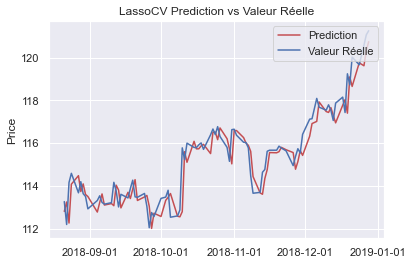

RMSE:  0.6802784303414444
R2 score:  0.8934081761650835


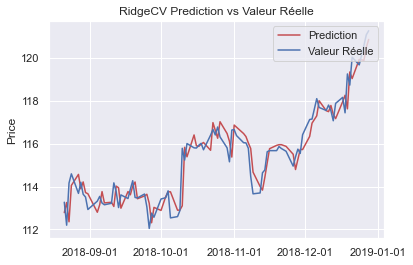

In [44]:
lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf_feat = lasso_clf.fit(X_train,y_train)
validate_result(lasso_clf_feat,'LassoCV')
solution_models['LassoCV All feat'] = lasso_clf_feat

ridge_clf_feat = ridge_clf.fit(X_train,y_train)
validate_result(ridge_clf_feat,'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat

5 - Bayesian Ridge

RMSE:  0.6854560432044575
R2 score:  0.8917794565085583


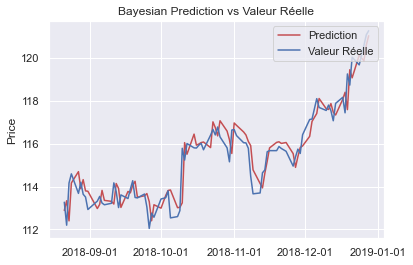

In [45]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train,y_train)
validate_result(bay_feat,'Bayesian')
solution_models['Bay All Feat'] = bay_feat

6 - Gradient Boosting Regressor

RMSE:  0.8621070947170115
R2 score:  0.8288121531230084


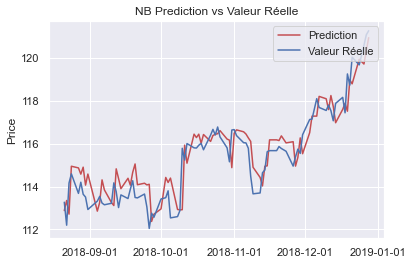

In [47]:
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train,y_train)
validate_result(GB_feat,'NB')
solution_models['GB All Feat'] = GB_feat

7 - Stochastic Gradient Descent (SGD)

RMSE:  0.7491830623528525
R2 score:  0.8707214739940466


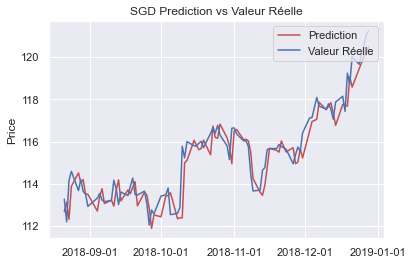

In [49]:
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_feat = sgd.fit(X_train,y_train)
validate_result(sgd_feat,'SGD')
solution_models['SGD All Feat'] = sgd_feat

* Affichage du Graphe des Différents Models

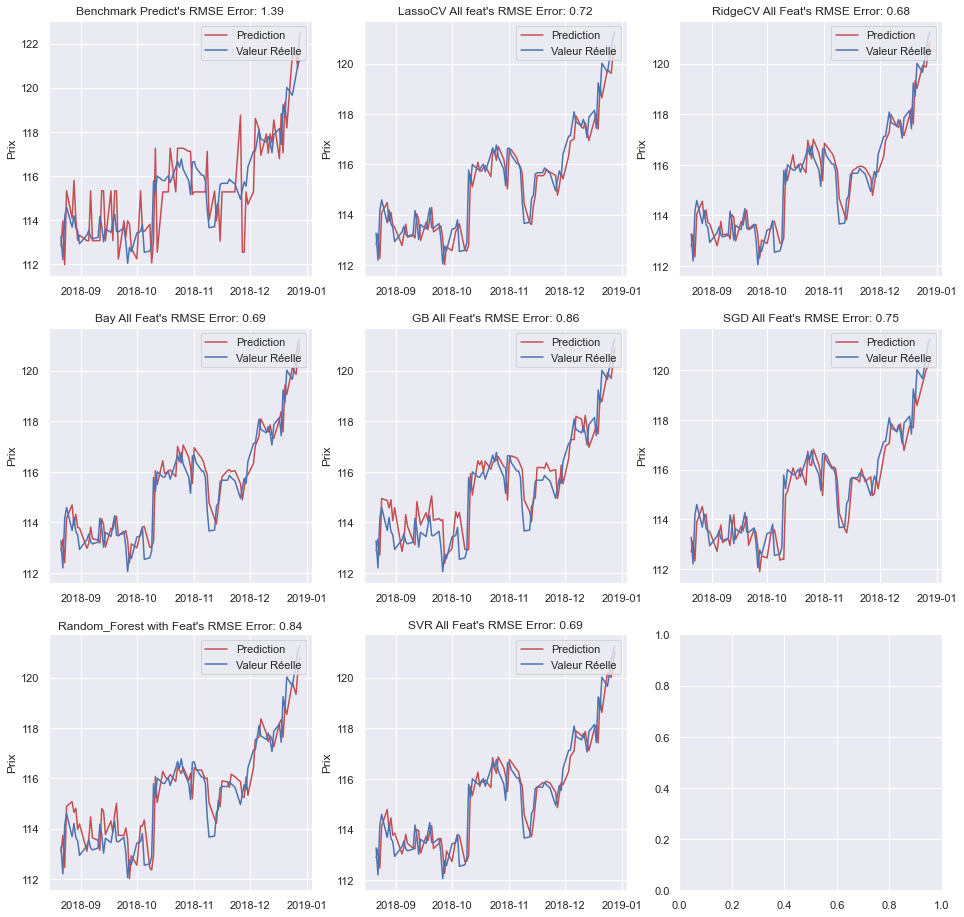

In [54]:
RMSE_scores = {}
def model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_predicted = benchmark_dt.predict(validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_predicted))
    RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_predicted,'r', label='Prediction')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Valeur Réelle')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Prix')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

           
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'r', label='Prediction')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Valeur Réelle')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Prix')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

model_review(solution_models)

* Comparaison de la RMSE de tous les modèles Utilisés

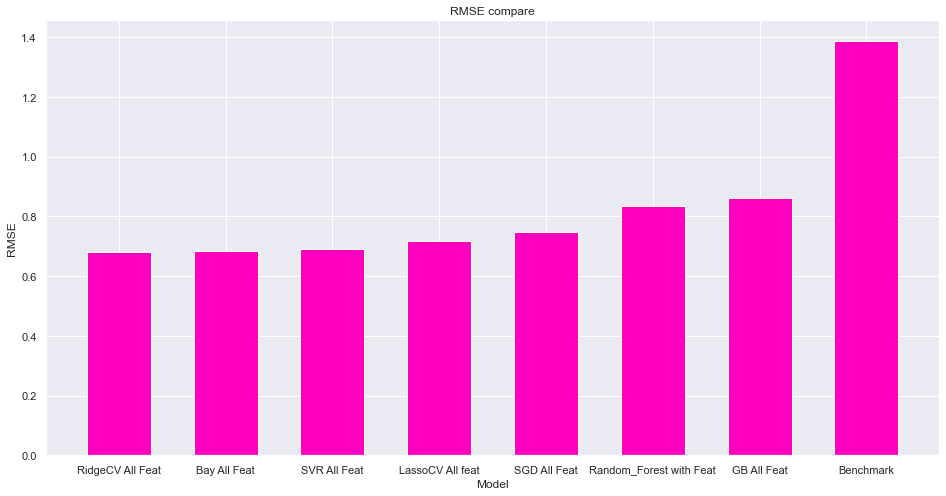

In [55]:
model_names = []
model_values = []
for name, value in RMSE_scores.items():
    model_names.append(name)
    model_values.append(value)

model_values = np.array(model_values)
model_names = np.array(model_names)

indices = np.argsort(model_values)
columns = model_names[indices[:8]]
values = model_values[indices][:8]

fig = plt.figure(figsize = (16,8))
plt.bar(np.arange(8), values ,width = 0.6, align="center", color = '#ff00c1')
plt.xticks(np.arange(8), columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare')   
plt.show()